#### Data wrangling is the process of convering and formatting data from its raw form to usable format.in order to analyse it.
#### without proper data wrangling,we cannot perform analysis and model building. A good data wrangling ensures a better accuracy of the model/algoritm

## Problem Statement:
### Lyft, Inc. is a transportation network company based in San Francisco, California and operating in 640 cities in the United States and 9 cities in Canada. It develops, markets, and operates the Lyft mobile app, offering car rides, scooters, and a bicycle-sharing system. It is the second largest rideshare company in the world, second to only Uber.
### Lyft’s bike-sharing service is also among the largest in the USA. Being able to anticipate demand is extremely important for planning of bicycles, stations, and the personnel required to maintain these. This demand is sensitive to a lot of factors like season, humidity, rain, weekdays, holidays, and more. To enable this planning, Lyft needs to rightly predict the demand according to these factors.

## Data Dictionary
## Attribute Information:

#### date = date of the ride
#### season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
#### holiday - whether the day is considered a holiday
#### workingday - whether the day is neither a weekend nor holiday
#### weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#### temp - temperature in Celsius
#### atemp - "feels like" temperature in Celsius
#### humidity - relative humidity
#### windspeed - wind speed
#### casual - number of non-registered user rentals initiated
#### registered - number of registered user rentals initiated
#### count - number of total rentals

### You are a data scientist and you are assigned a task of performing data wrangling on a set of datasets. These datasets may have ambiguities.You have to identify these ambiguities,and apply different data wrangling techniques to get the datasets ready for usage

In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading the data into a dataframe:
data1=pd.read_csv('dataset_1.csv')
data1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


In [3]:
data1.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22
609,610,28-01-2011,1,0,1,15,False,5,2,0.20


In [4]:
data1.shape

(610, 10)

In [5]:
#to check only column names
data1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp'],
      dtype='object')

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    object 
 2   season      610 non-null    int64  
 3   yr          610 non-null    int64  
 4   mnth        610 non-null    int64  
 5   hr          610 non-null    int64  
 6   holiday     610 non-null    bool   
 7   weekday     610 non-null    int64  
 8   weathersit  610 non-null    int64  
 9   temp        610 non-null    float64
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 43.6+ KB


In [7]:
data1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64

In [8]:
data2=pd.read_excel('dataset_2.xlsx')
data2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [9]:
data2.tail()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38
609,609,610,0.2576,0.86,0.0000,1,40,41


In [10]:
data2.columns

Index(['Unnamed: 0', 'instant', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [11]:
data2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
data2.columns

Index(['instant', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [13]:
data2.shape

(610, 7)

In [14]:
##combining both the files and storing it into another dataframe:
combined_data=pd.merge(data1,data2,on='instant')
combined_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
combined_data.shape

(610, 16)

In [16]:
data3=pd.read_csv('dataset_3.csv')
data3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [17]:
data3.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23
389,619,29-01-2011,1,0,1,0,False,6,1,0.22,0.1970,0.64,0.3582,2,26,28


In [18]:
data3=data3.sort_values(by='instant')

In [19]:
data3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
381,611,28-01-2011,1,0,1,16,False,5,1,0.22,0.2727,0.80,0.0000,10,70,80
382,612,28-01-2011,1,0,1,17,False,5,1,0.24,0.2424,0.75,0.1343,2,147,149
383,613,28-01-2011,1,0,1,18,False,5,1,0.24,0.2273,0.75,0.1940,2,107,109
384,614,28-01-2011,1,0,1,19,False,5,2,0.24,0.2424,0.75,0.1343,5,84,89
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62


In [20]:
data3.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
376,996,14-02-2011,1,0,2,3,False,1,1,0.34,0.3182,0.46,0.2239,1,1,2
377,997,14-02-2011,1,0,2,4,False,1,1,0.32,0.3030,0.53,0.2836,0,2,2
378,998,14-02-2011,1,0,2,5,False,1,1,0.32,0.3030,0.53,0.2836,0,3,3
379,999,14-02-2011,1,0,2,6,False,1,1,0.34,0.3030,0.46,0.2985,1,25,26
380,1000,14-02-2011,1,0,2,7,False,1,1,0.34,0.3030,0.46,0.2985,2,96,98


In [21]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 381 to 380
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     390 non-null    int64  
 1   dteday      390 non-null    object 
 2   season      390 non-null    int64  
 3   yr          390 non-null    int64  
 4   mnth        390 non-null    int64  
 5   hr          390 non-null    int64  
 6   holiday     390 non-null    bool   
 7   weekday     390 non-null    int64  
 8   weathersit  390 non-null    int64  
 9   temp        390 non-null    float64
 10  atemp       390 non-null    float64
 11  hum         390 non-null    float64
 12  windspeed   390 non-null    float64
 13  casual      390 non-null    int64  
 14  registered  390 non-null    int64  
 15  cnt         390 non-null    int64  
dtypes: bool(1), float64(4), int64(10), object(1)
memory usage: 49.1+ KB


In [22]:
data3.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [23]:
combined_data.columns==data3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [24]:
###check if the data has duplicate rows:
duplicates=data3[data3.duplicated()]
duplicates

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [25]:
combined_data.shape

(610, 16)

In [26]:
data3.shape

(390, 16)

In [27]:
final_data=pd.concat([combined_data,data3])
final_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,996,14-02-2011,1,0,2,3,False,1,1,0.34,0.3182,0.46,0.2239,1,1,2
377,997,14-02-2011,1,0,2,4,False,1,1,0.32,0.3030,0.53,0.2836,0,2,2
378,998,14-02-2011,1,0,2,5,False,1,1,0.32,0.3030,0.53,0.2836,0,3,3
379,999,14-02-2011,1,0,2,6,False,1,1,0.34,0.3030,0.46,0.2985,1,25,26


In [28]:
final_data.shape

(1000, 16)

In [29]:
final_data.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
weathersit     0
temp           0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [30]:
### if the missing value % is less 20% --->drop missing values
### if the missing value % is between 20-70 % ---> impute missing values
#### if missing value % is greater than 70%-----> drop the variable with missing values.

In [31]:
11/1000

0.011

In [32]:
###as the missing value % is lesser than 20% we drop the rows with missing values.
final_data.dropna(inplace=True)

In [33]:
final_data.shape

(989, 16)

In [34]:
### check for duplicates:
duplicate_rows=final_data[final_data.duplicated()]
duplicate_rows

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Sanity checks on data- checks the logical correctness of the data

In [35]:
np.sum(final_data['casual']+final_data['registered']-final_data['cnt'])

0

In [36]:
###rename the variable names to more logically relevent ones-:
final_data.rename(columns={'dteday':'Date','yr':'Year','mnth':'Month','hr':'Hour','weathersit':'Weather','temp':'Temperature',
                          'hum':'Humidity','cnt':'Count'},inplace=True)

In [37]:
final_data.columns

Index(['instant', 'Date', 'season', 'Year', 'Month', 'Hour', 'holiday',
       'weekday', 'Weather', 'Temperature', 'atemp', 'Humidity', 'windspeed',
       'casual', 'registered', 'Count'],
      dtype='object')

In [38]:
np.sum(final_data['casual']+final_data['registered']-final_data['Count'])

0

In [39]:
###checking if month and hour have discrepancies:
print(np.unique(final_data.Hour))
print(np.unique(final_data.Month))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2]


In [40]:
###segregate the numeric and categorical variables:
numeric_variables=final_data.select_dtypes(include='number')
categorical_variables=final_data.select_dtypes(exclude='number')



In [41]:
numeric_variables.columns

Index(['instant', 'season', 'Year', 'Month', 'Hour', 'weekday', 'Weather',
       'Temperature', 'atemp', 'Humidity', 'windspeed', 'casual', 'registered',
       'Count'],
      dtype='object')

In [42]:
categorical_variables.shape[1]

2

In [43]:
categorical_variables.columns

Index(['Date', 'holiday'], dtype='object')

In [44]:
final_data.shape

(989, 16)

#### when we join two data tables we perform the join based on row indexes,merging of two tables can be done based on a primary key(matching column or row) while concat can be used to stack dataframes either horizontally or vertically without any commonality.

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: ylabel='Density'>

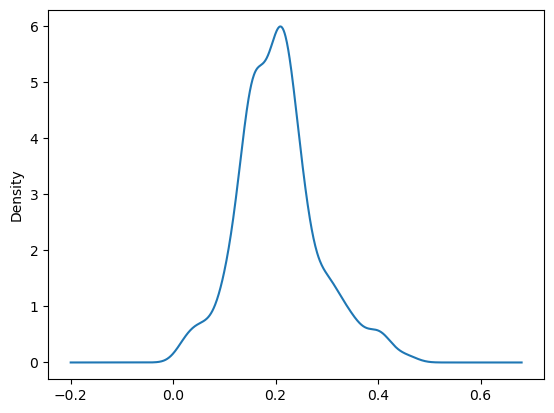

In [46]:
final_data.Temperature.plot.density()

#### All continuous variables should follow a normal distribution.

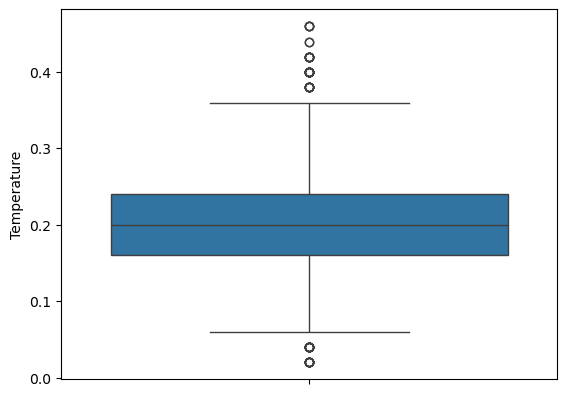

In [47]:
sns.boxplot(final_data.Temperature)
plt.show()

In [48]:
final_data.describe() #describe gives us the summary stats for all the numeric variables in the data

,instant,season,Year,Month,Hour,weekday,Weather,Temperature,atemp,Humidity,windspeed,casual,registered,Count
count,989.000000,989.0,989.0,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,505.622851,1.0,0.0,1.315470,11.753286,2.991911,1.479272,0.204712,0.211958,0.581769,0.194609,4.921132,53.689585,58.610718
std,286.274765,0.0,0.0,0.464938,6.891129,2.084727,0.651085,0.077789,0.076703,0.187706,0.129225,7.666231,48.019224,51.120572
min,1.000000,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,259.000000,1.0,0.0,1.000000,6.000000,1.000000,1.000000,0.160000,0.166700,0.440000,0.104500,0.000000,15.000000,16.000000
50%,506.000000,1.0,0.0,1.000000,12.000000,3.000000,1.000000,0.200000,0.212100,0.550000,0.164200,3.000000,46.000000,50.000000
75%,753.000000,1.0,0.0,2.000000,18.000000,5.000000,2.000000,0.240000,0.257600,0.700000,0.283600,6.000000,75.000000,84.000000
max,1000.000000,1.0,0.0,2.000000,23.000000,6.000000,4.000000,0.460000,0.454500,1.000000,0.582100,62.000000,247.000000,249.000000


In [49]:
###  box plots is a five number summary,which includes minimum,Q1,median,Q3,maximum.
#### Interquartile range is Q3-Q1,represents 50% of the data
#### the values below Q1-1.5IQR and above Q3+1.5IQR are called the negetive and positive outliers.

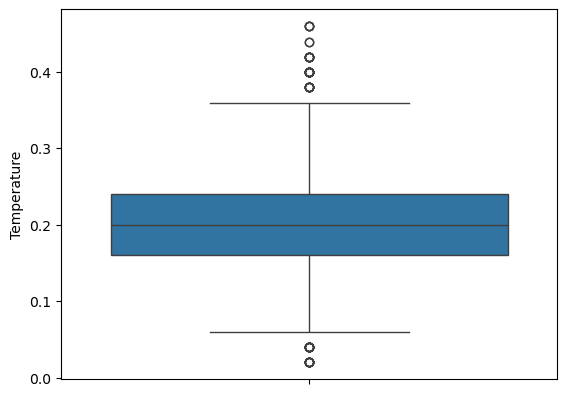

In [50]:
sns.boxplot(final_data.Temperature)
plt.show()

<Axes: ylabel='Frequency'>

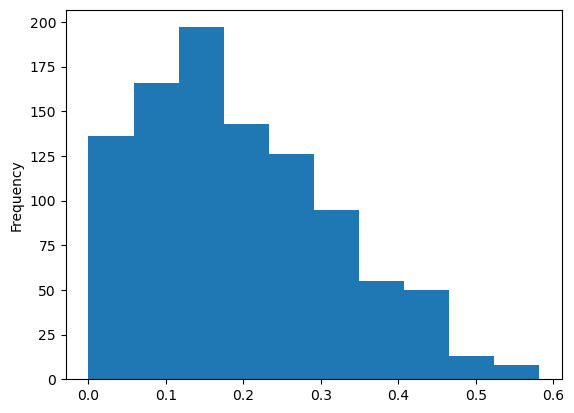

In [51]:
####check the distribution for windspeed.
final_data.windspeed.plot.hist()

<Axes: ylabel='Density'>

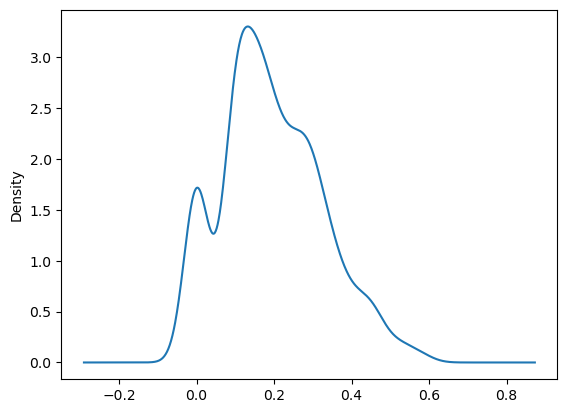

In [52]:
final_data.windspeed.plot.density()

<Axes: ylabel='windspeed'>

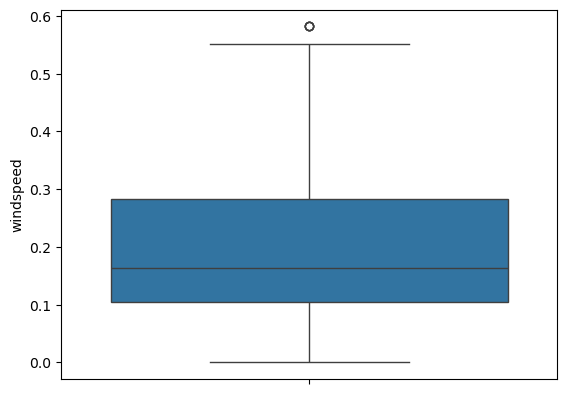

In [53]:
sns.boxplot(final_data.windspeed)

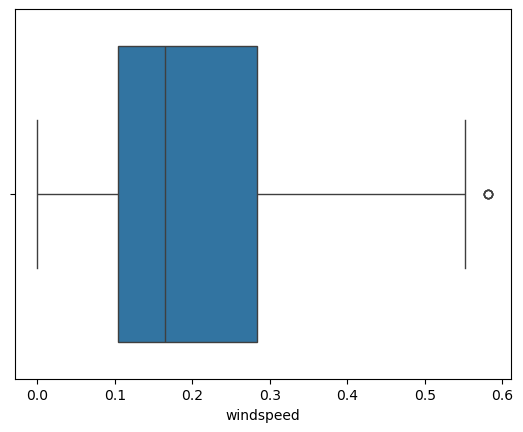

In [54]:
sns.boxplot(x=final_data['windspeed'])
plt.show()

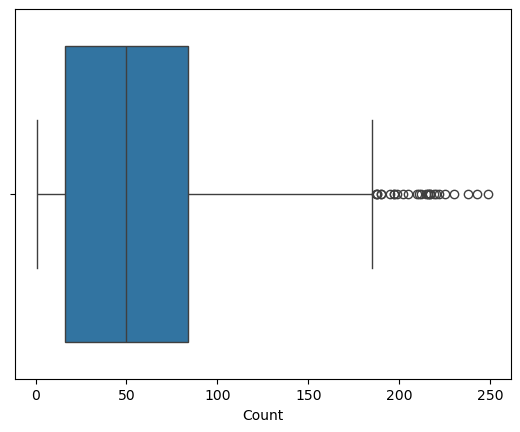

In [55]:
sns.boxplot(x=final_data['Count'])
plt.show()

In [56]:
final_data['Count'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25     16.00
0.50     50.00
0.75     84.00
0.90    130.40
0.95    166.00
0.99    216.12
Name: Count, dtype: float64

In [57]:
###216.12 is the 99th percentile,only 1% of the data is above it.

In [58]:
final_data=final_data[final_data['Count']<217].copy()

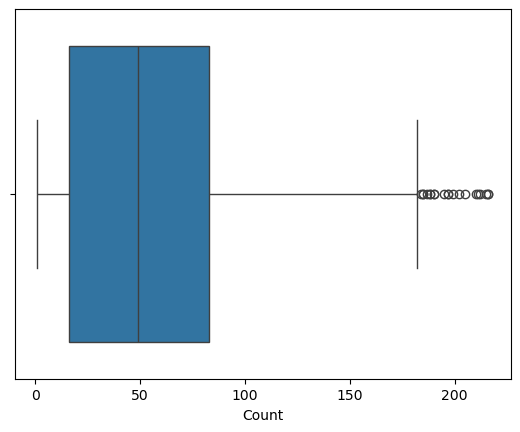

In [59]:
sns.boxplot(x=final_data['Count'])
plt.show()

In [60]:
final_data.shape

(979, 16)

In [61]:
###Q) make a boxplot for count vs hr and givw your observations on the same.

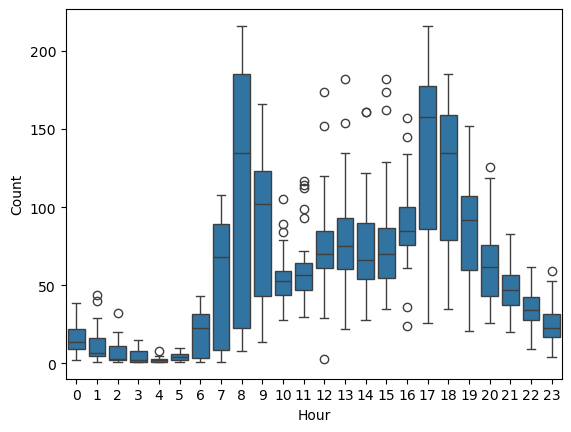

In [62]:
sns.boxplot(x='Hour',y='Count',data=final_data)
plt.show()

* demand increases early in the morning 6am-8.30am,starts falling from 9am,remains stable throughout the day and increases in the evening,recording the highest at 5pm

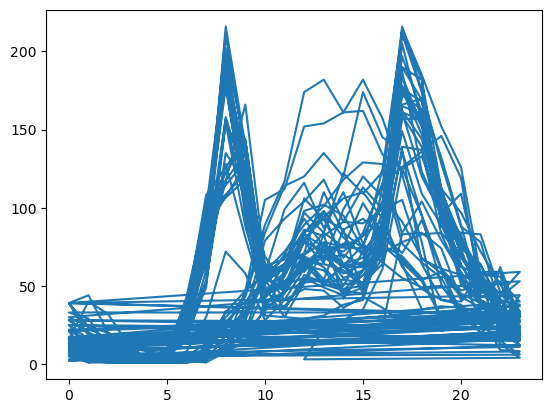

In [64]:
plt.plot(final_data['Hour'],final_data['Count'])
plt.show()

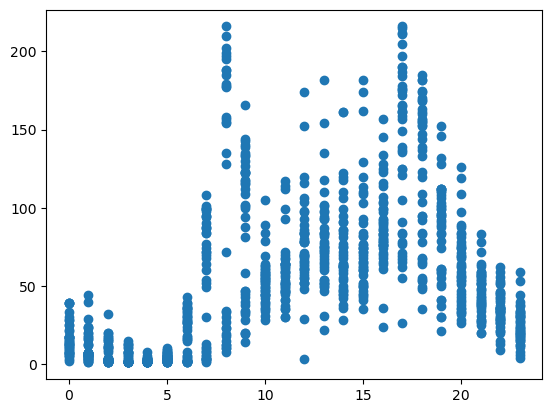

In [65]:
plt.scatter(final_data['Hour'],final_data['Count'])
plt.show()

In [66]:
### the points in a scatterplot joined by lines is a lineplot

In [67]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


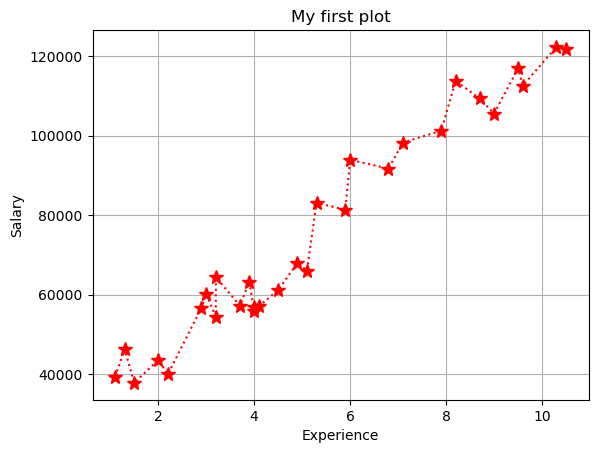

In [91]:
x=np.array([12,19,36,21,45])
y=np.sin(x)
y1 =2*x+6


plt.plot(salary['YearsExperience'],salary['Salary'],color='red',markersize=10,marker='*',linestyle='dotted')
#plt.plot(x,y,color='green',markersize=8,marker='+',label='2nd line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('My first plot')
plt.grid()
plt.show()

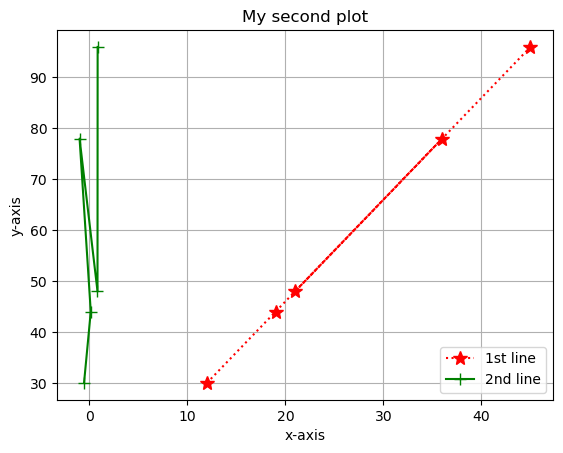

In [94]:
plt.plot(x,y1,color='red',markersize=10,marker='*',linestyle='dotted',label='1st line')
plt.plot(y,y1,color='green',markersize=8,marker='+',label='2nd line')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My second plot')
plt.grid()
plt.legend()
plt.show()

In [82]:
#?plt.plot

In [69]:
###as we see above there is a clear positive relationship,let us give a value to this relationship. 
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [70]:
### when years of experience increases by 1 unit,the salary increases by 0.978242 units.
#### 0.978242 is called pearsons correlation coefficient.

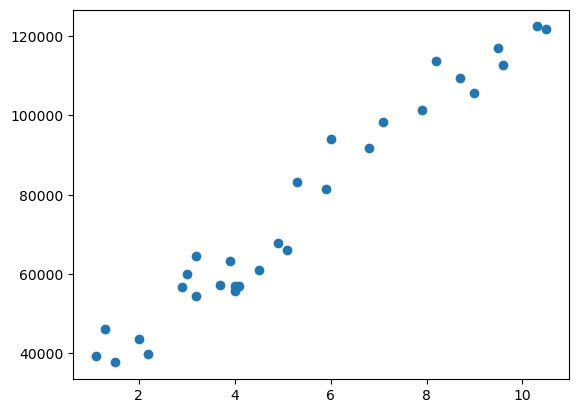

In [71]:
plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.show()

In [76]:
###explore a categorical variable we use barplots or countplots.
#sns.countplot(x='season',data=final_data)
#plt.show()

print(np.unique(final_data.season))

[1]


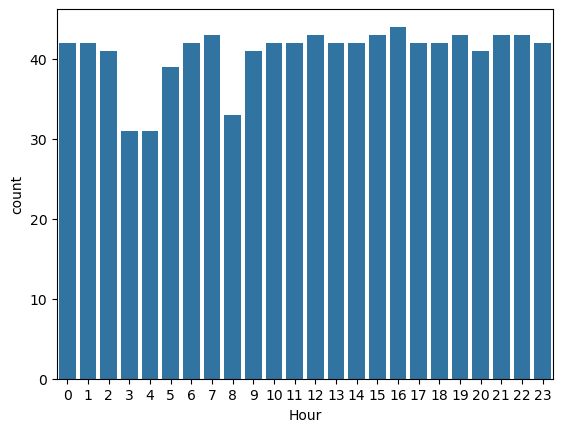

In [73]:
#print(np.unique(final_data.Hour))
sns.countplot(x='Hour',data=final_data)
plt.show()



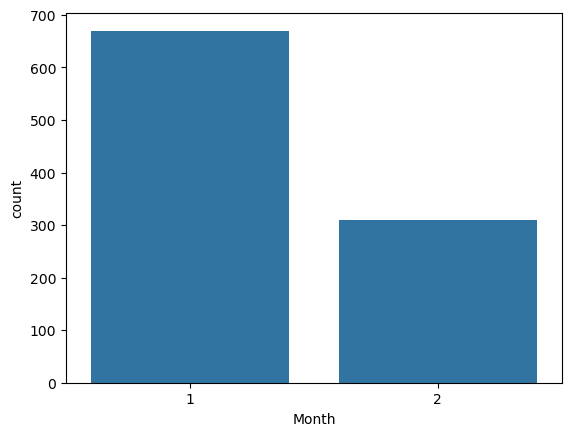

In [75]:
sns.countplot(x='Month',data=final_data)
plt.show()


In [77]:
#### most of the rides are recorded in jan,and at 4pm